# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [6]:
data.duplicated(keep='first').sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [8]:
chars_to_remove = [",", "$"]

columns_to_clean = data[["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]]

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, '')
    data[col] = pd.to_numeric(data[col])

In [9]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])
data["Release_Date"].head()

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
# Average Production budget of the films 
data["USD_Production_Budget"].mean()

31113737.57837136

In [12]:
# Average worldwide gross revenue
data["USD_Worldwide_Gross"].mean()

88855421.96271564

In [13]:
# Minimum worldwide and domestic revenue
print(f'Minimum worldwide revenue: {data["USD_Worldwide_Gross"].min()}')
print(f'Minimum domestic revenue: {data["USD_Domestic_Gross"].min()}')

Minimum worldwide revenue: 0
Minimum domestic revenue: 0


In [14]:
# Are the bottom 25% of films actually profitable or do they lose money?

# calculate Profit in additional column
data["USD_Profit"] = data.USD_Worldwide_Gross - data.USD_Production_Budget
# boolean if Movie is profitable or not
data['Movie_is_Profitable'] = data['USD_Profit'].apply(lambda x: x > 0)
 
# define 25% percentile with respect to Worldwide Gross
world_wide_gross_25percentile = data.USD_Worldwide_Gross.quantile(0.25)
 
# Grouped Count by Profitability Yes/No
data[data.USD_Worldwide_Gross <= world_wide_gross_25percentile].Movie_is_Profitable.value_counts()

False    1175
True      173
Name: Movie_is_Profitable, dtype: int64

In [15]:
# What are the highest production budget and highest worldwide gross revenue of any film?
print(f'Highest production budget :{data["USD_Production_Budget"].max()}')
print(f'Highest worldwide Gross: {data["USD_Worldwide_Gross"].max()}')

Highest production budget :425000000
Highest worldwide Gross: 2783918982


In [16]:
# How much revenue did the lowest films make?
lowest_budget = data["USD_Production_Budget"].min()
data[data["USD_Production_Budget"] == lowest_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941,True


In [17]:
# How much revenue did the highest films make?
highest_budget = data["USD_Production_Budget"].max()
data[data["USD_Production_Budget"] == highest_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982,True


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [21]:
zero_domestic = data[data["USD_Domestic_Gross"]==0]
print(f"Number of films that grossed $0 domestically: {len(zero_domestic)}")

zero_domestic.sort_values("USD_Production_Budget", ascending=False)

Number of films that grossed $0 domestically: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,False
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,False
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,False
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,False
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340,False
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,False
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,False
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,False
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,False


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [22]:
zero_worldwide = data[data["USD_Worldwide_Gross"]==0]
print(f"Number of films that grossed $0 worldwide: {len(zero_worldwide)}")

zero_worldwide.sort_values("USD_Production_Budget", ascending=False)

Number of films that grossed $0 worldwide: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,False
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,False
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,False
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,False
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000,False
...,...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,False
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,False
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,False
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,False


### Filtering on Multiple Conditions

In [25]:
international_releases = data.loc[(data["USD_Domestic_Gross"]== 0) & (data["USD_Worldwide_Gross"] !=0)]
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780,False
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110,False
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406,True
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820,False
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258,False


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [28]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
print(f"Number of international releases: {len(international_releases)}")
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911,False
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172,True
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439,False
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527,True
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,-3963370,False


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [29]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [31]:
future_releases = data[data["Release_Date"] >= scrape_date]
print(f"Number of unreleased movies: {len(future_releases)}")

future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,False
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,False
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000,False
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,False
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,False
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,False
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000,False


In [32]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [33]:
money_losing = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")

percentage_loss = len(money_losing)/len(data_clean) * 100
percentage_loss

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

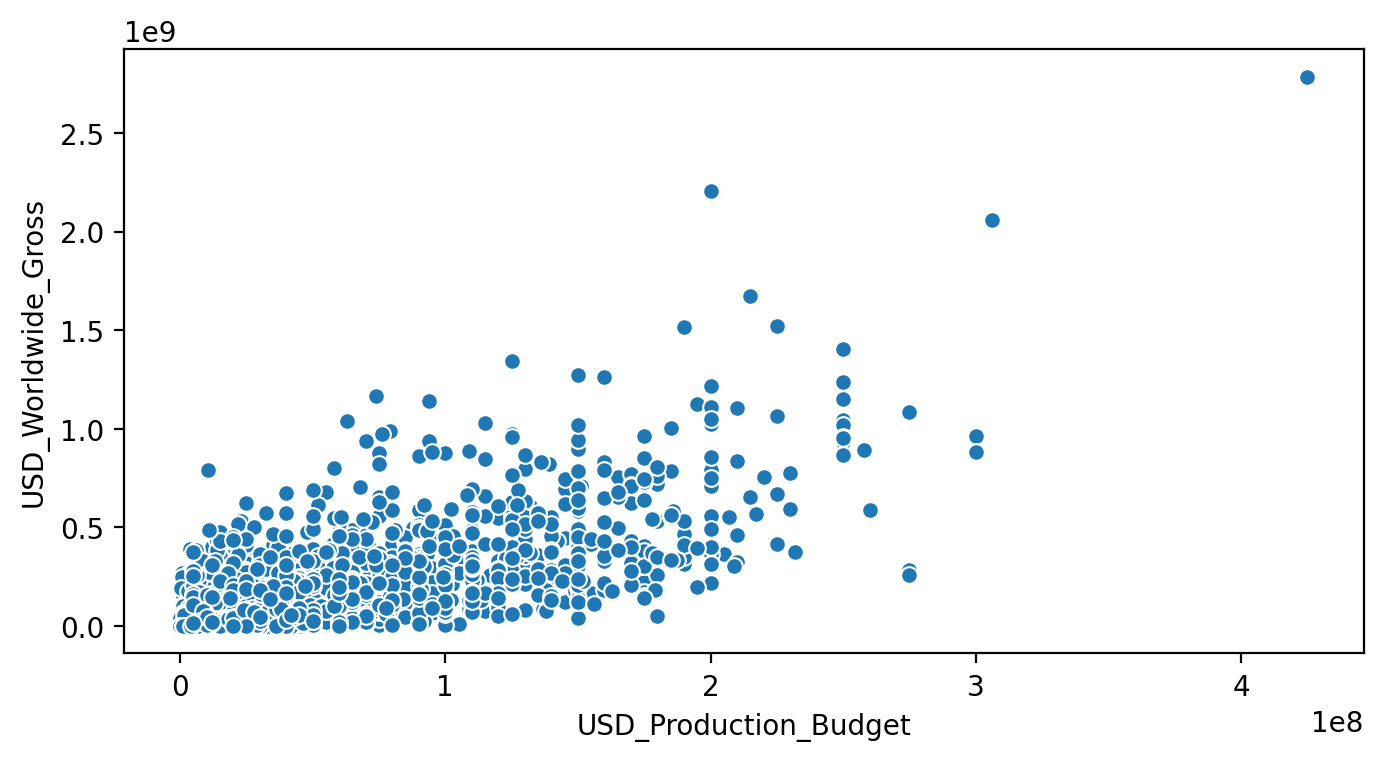

In [36]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean,
               x="USD_Production_Budget",
               y="USD_Worldwide_Gross")
plt.show()

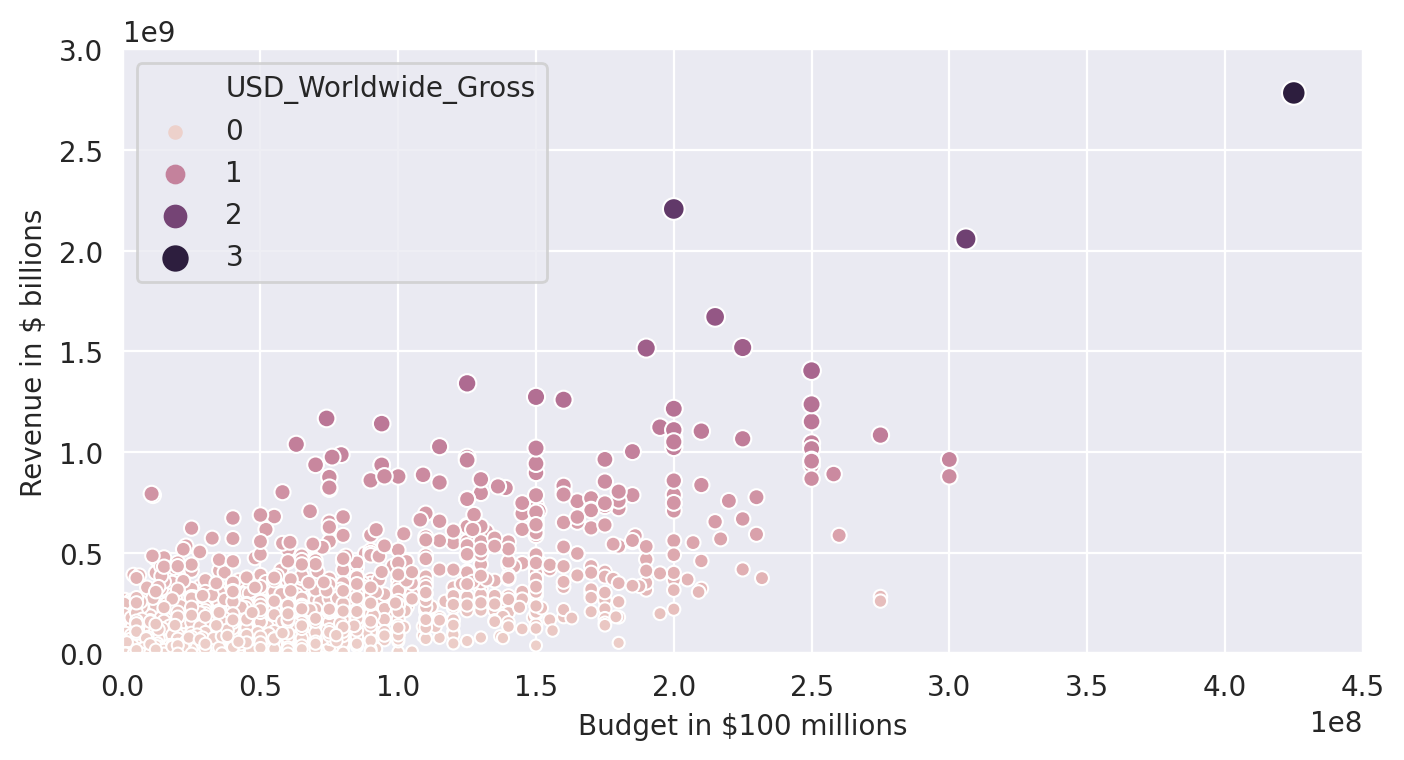

In [41]:
# SCATTER PLOT TO BUBBLE PLOT
plt.figure(figsize=(8,4), dpi=200)

#Styling on single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                        x="USD_Production_Budget",
                        y='USD_Worldwide_Gross',
                        hue="USD_Worldwide_Gross", # color
                        size="USD_Worldwide_Gross",) # Dot size

    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel="Revenue in $ billions",
          xlabel="Budget in $100 millions",)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



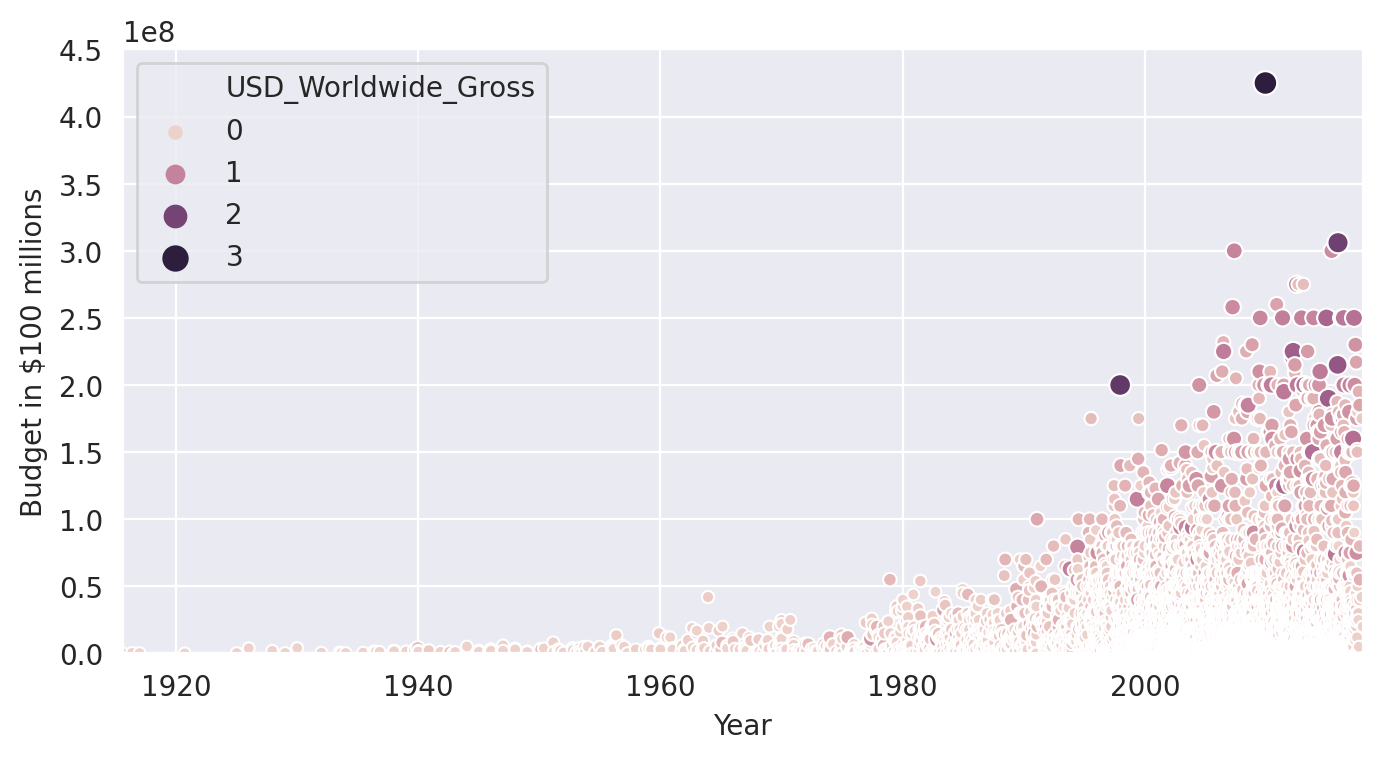

In [49]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data= data_clean,
                        x="Release_Date",
                        y="USD_Production_Budget",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")
    
    ax.set(ylim=(0, 450000000),
          xlim=(data_clean["Release_Date"].min(), data_clean["Release_Date"].max()),
          xlabel="Year",
          ylabel="Budget in $100 millions")
    
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [50]:
dt_index = pd.DatetimeIndex(data_clean["Release_Date"])
years = dt_index.year

decades = years//10*10
data_clean['Decade'] = decades

In [51]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,True,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,False,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,True,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,True,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,True,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [53]:
old_films = data_clean[data_clean['Decade'] <= 1960]
new_films = data_clean[data_clean["Decade"] > 1960]

In [54]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Decade
count,153.00,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","25,808,336.73","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41","54,245,459.17",12.72
min,"1,253.00","100,000.00",0.00,0.00,"-14,250,000.00","1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","2,175,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","7,364,370.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","27,402,877.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","386,625,192.00","1,960.00"


In [55]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,USD_Profit,Movie_is_Profitable,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,29000000,True,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,True,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,False,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,False,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,True,1960


# Seaborn Regression Plots

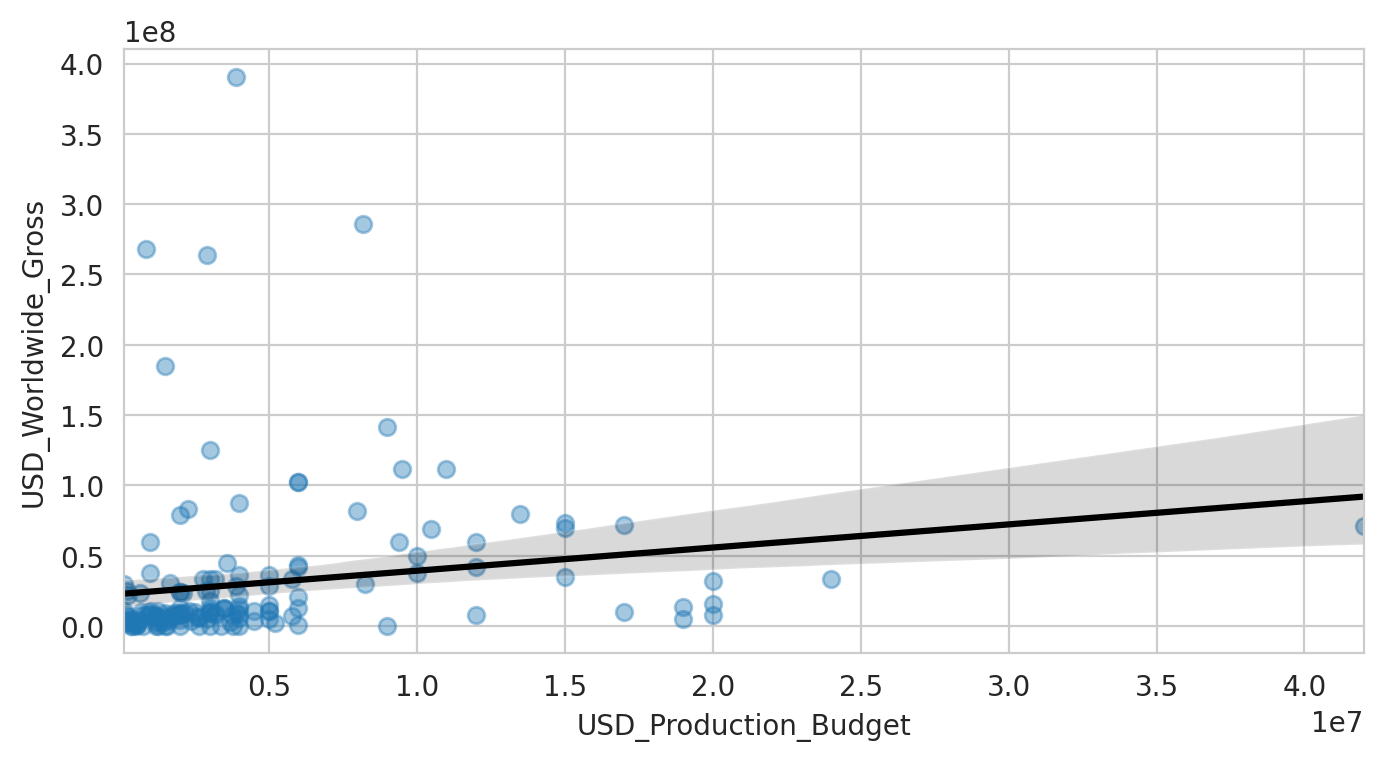

In [56]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
               x="USD_Production_Budget",
               y='USD_Worldwide_Gross',
               scatter_kws={"alpha": 0.4},
               line_kws={"color": "black"})
    
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

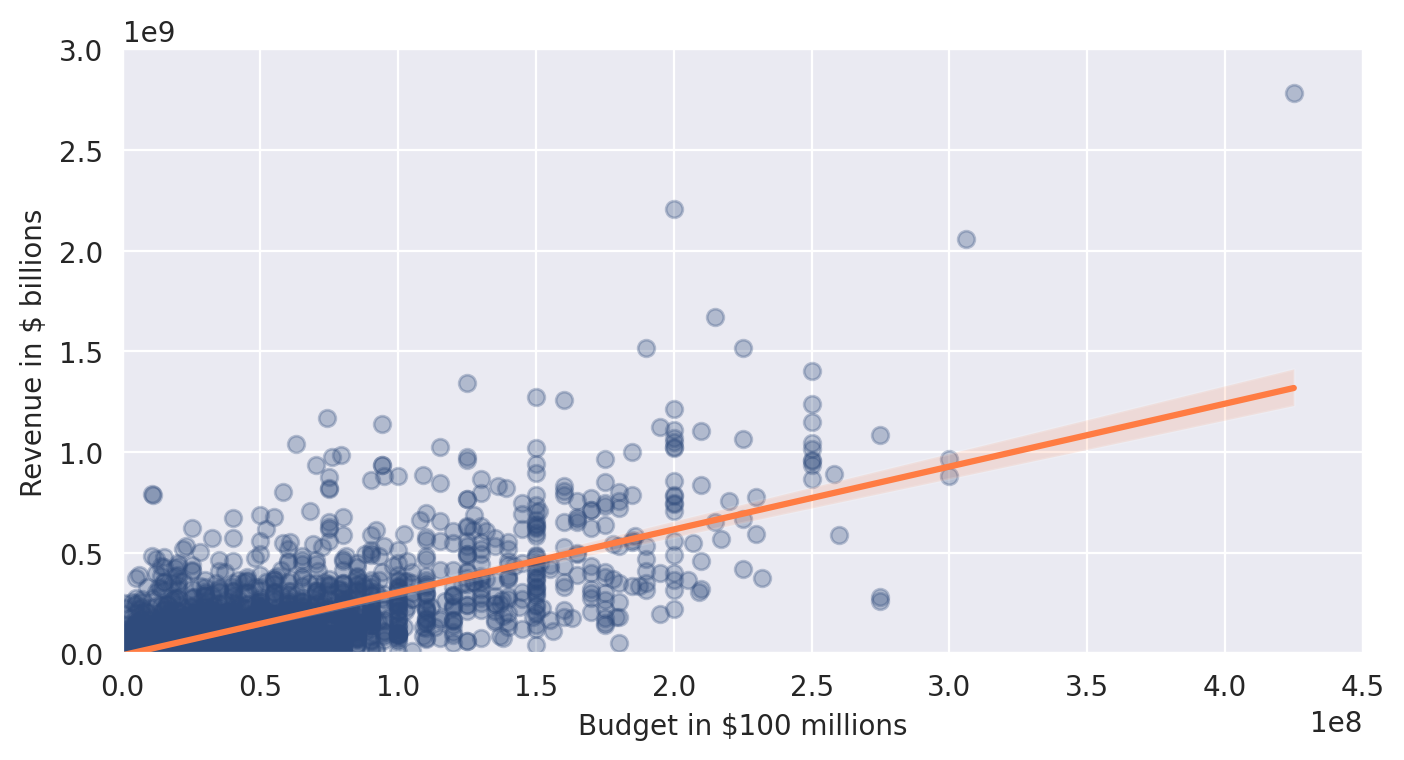

In [57]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
               x="USD_Production_Budget",
               y='USD_Worldwide_Gross',
               color='#2f4b7c',
               scatter_kws={'alpha':0.3},
               line_kws={'color':"#ff7c43"})
    
    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel="Revenue in $ billions",
          xlabel="Budget in $100 millions")
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [59]:
regression = LinearRegression()

In [60]:
# Explanatory Variable or Feature
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Responsible Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [63]:
# Find the best fit line
regression.fit(X,y)

LinearRegression()

In [64]:
# Theta zero
regression.intercept_

array([-8650768.00661026])

In [65]:
# Theta one
regression.coef_

array([[3.12259592]])

In [66]:
# R- Squared
regression.score(X,y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [67]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

regression.fit(X, y)

print(f"The slope coefficient is: {regression.coef_[0]}")
print(f"The intercept is : {regression.intercept_[0]}")
print(f"The r-squared is: {regression.score(X,y)}")

The slope coefficient is: [1.64771314]
The intercept is : 22821538.635080382
The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
# Revenue =  22821538 + 1.64771314 * 350000000

In [69]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate

599521139.0388365

In [70]:
revenue_estimate = round(revenue_estimate, -6)
revenue_estimate

600000000.0

In [71]:
# The colon : and dot . in a print statement is quite handy for controlling the number of digits 
# you'd like to show up in the output
print(f"The estimated revenue for a $350 film is around ${revenue_estimate:.10}")

The estimated revenue for a $350 film is around $600000000.0
